In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession

spark=SparkSession.builder.appName('FordGoBike').getOrCreate()
spark




In [26]:
path="/content/drive/MyDrive/Develhope/develhope-Data5-Team3/Data/week_2"
df=spark.read.csv(path,header=True, inferSchema=True)

In [6]:
df.columns

['start_time',
 'start_am_pm',
 'end_time',
 'end_am_pm',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'pyment',
 'haversine_distance',
 'Diff_in_seconds',
 'Diff_in_minutes',
 'Trip_cost']

##TASK_1 - calculate the total cost for all customers and all subscribers

In [27]:
df.groupBy('user_type').agg({'Trip_cost': 'sum'}).show()

+----------+------------------+
| user_type|    sum(Trip_cost)|
+----------+------------------+
|Subscriber|1810118.8525000028|
|  Customer|1634609.2525000186|
+----------+------------------+



##TASK_2 - Analyze how often bikes are being rented ( morning - afternoon - evening) and and find the density for each hour of the day

In [28]:
#https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc

df=df.withColumn('time_of_the_day', F.when(((F.hour('start_time')>=5) & (F.hour('start_time')<12)),'Morning')\
                      .otherwise(F.when((F.hour('start_time')>=12)&(F.hour('start_time')<18),'Afternoon')\
                      .otherwise(F.when((F.hour('start_time')>=18)&(F.hour('start_time')<21),'Evening')\
                                 .otherwise('Night'))))


In [54]:
df_time_of_day=df.groupBy('time_of_the_day').agg(F.count('start_time').alias('total_rents'))

In [55]:
df_time_of_day.show()

+---------------+-----------+
|time_of_the_day|total_rents|
+---------------+-----------+
|        Evening|      88993|
|        Morning|     190751|
|      Afternoon|     212364|
|          Night|      27592|
+---------------+-----------+



In [45]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [56]:
pd=df_time_of_day.toPandas()

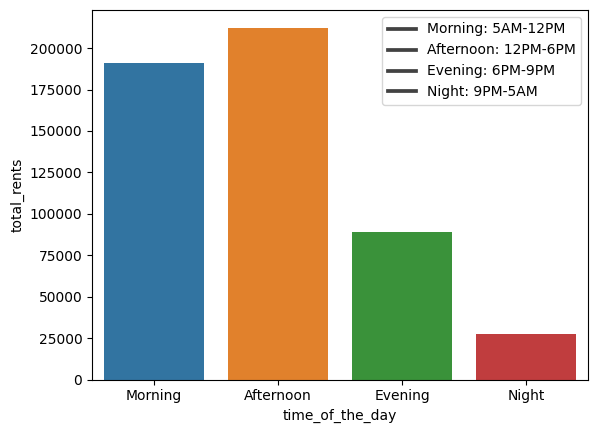

In [70]:
sn.barplot(x= pd["time_of_the_day"], y= pd['total_rents'], data=pd, order=['Morning','Afternoon','Evening','Night'])
plt.legend(['Morning: 5AM-12PM', 'Afternoon: 12PM-6PM','Evening: 6PM-9PM', 'Night: 9PM-5AM'])

In [62]:
df_hour=df.groupBy(F.hour('start_time').alias('hour')).agg(F.count('start_time').alias('total_count')).sort(F.hour('start_time'))

In [63]:
df_hour.show()

+----+-----------+
|hour|total_count|
+----+-----------+
|   1|       1864|
|   2|        922|
|   3|        421|
|   4|        656|
|   5|       2161|
|   6|       8959|
|   7|      26931|
|   8|      57425|
|   9|      45605|
|  10|      25324|
|  11|      24346|
|  12|      30480|
|  13|      27371|
|  14|      24888|
|  15|      28404|
|  16|      41248|
|  17|      59973|
|  18|      45941|
|  19|      26494|
|  20|      16558|
+----+-----------+
only showing top 20 rows



In [66]:
pd_2=df_hour.toPandas()

<Axes: xlabel='hour', ylabel='total_count'>

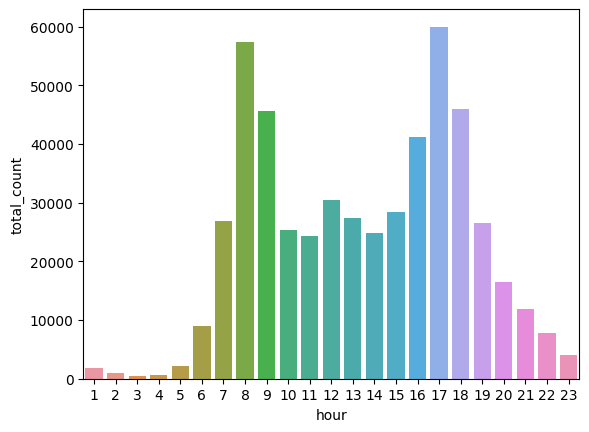

In [69]:
sn.barplot(x= pd_2["hour"], y= pd_2['total_count'], data=pd_2)